<a href="https://colab.research.google.com/github/shalini0517/LGMVIP-DATASCIENCE/blob/puchii/TASK02INTERMEDIATELEVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LGM VIRTUAL INTERNSHIP PROGRAM 2021**

**INTERMEDIATE LEVEL TASK 02-Prediction using Decision Tree  Algorithm**

**DOMAIN-DATA SCIENCE**

**BY-SHALINI PATEL**

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import graphviz

READING DATA FROM CSV FILE

In [4]:
iris = pd.read_csv('Iris.csv')

IT WILL PRINT FIRST 5 ROWS

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


IT WILL PRINT 5 ROW FROM LAST

In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


INFROMATION ABOUT DATA

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.shape

(150, 6)

In [11]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

 Data points count value for each one species

In [14]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


Droping Id column

In [15]:
iris.drop(['Id'], axis=1,inplace=True)

**Data visualization**

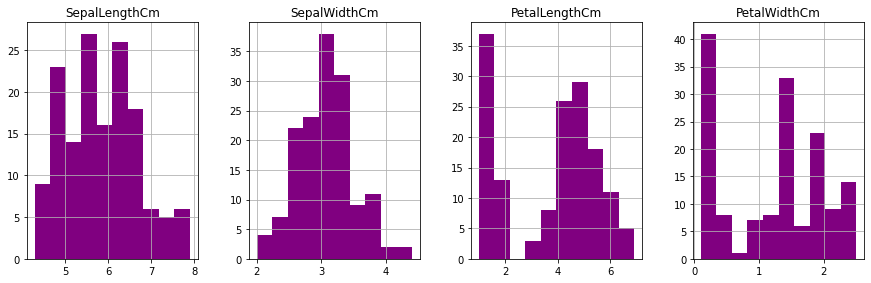

In [16]:
iris.hist(figsize=(15,10), layout=(2,4), color="purple");

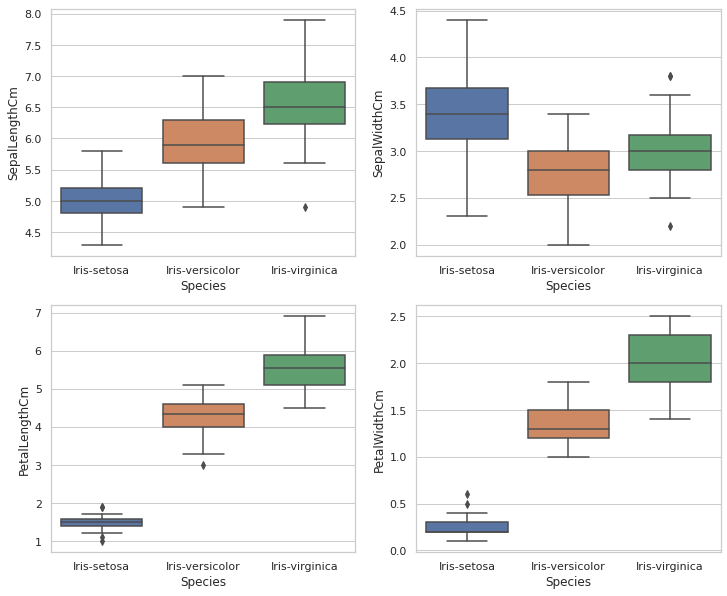

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.show()

Pair Plot

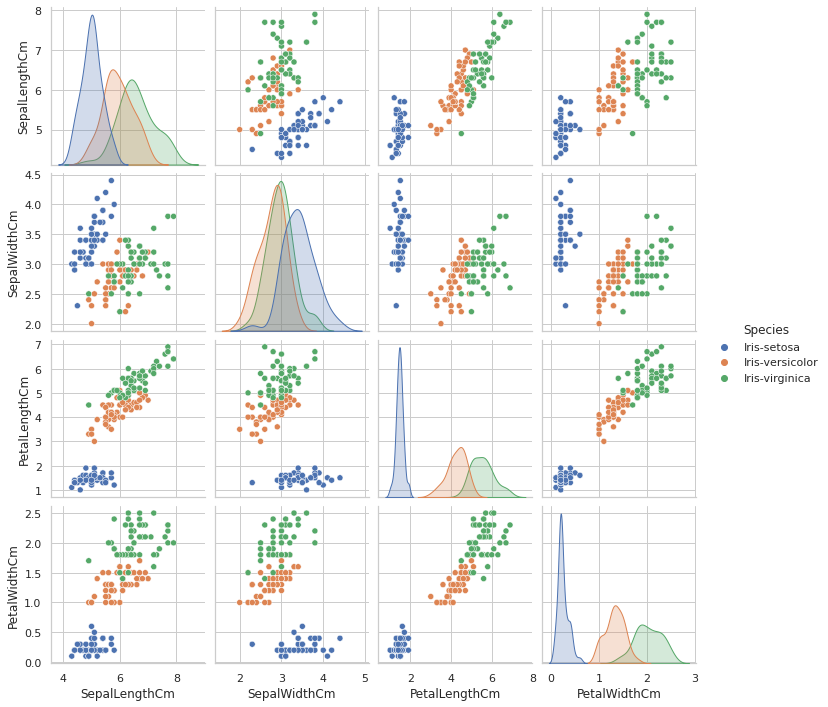

In [18]:
sns.pairplot(data=iris, hue='Species')
plt.show()

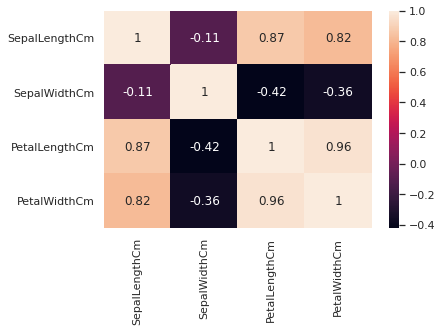

In [19]:
sns.heatmap(iris.corr(), annot=True);

In [20]:
X = iris.iloc[:, :-1] # X = feature values, all the columns except the last column
y = iris.iloc[:, -1] # y = target values, last column of the data frame

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, y)

**DECISION TREE**

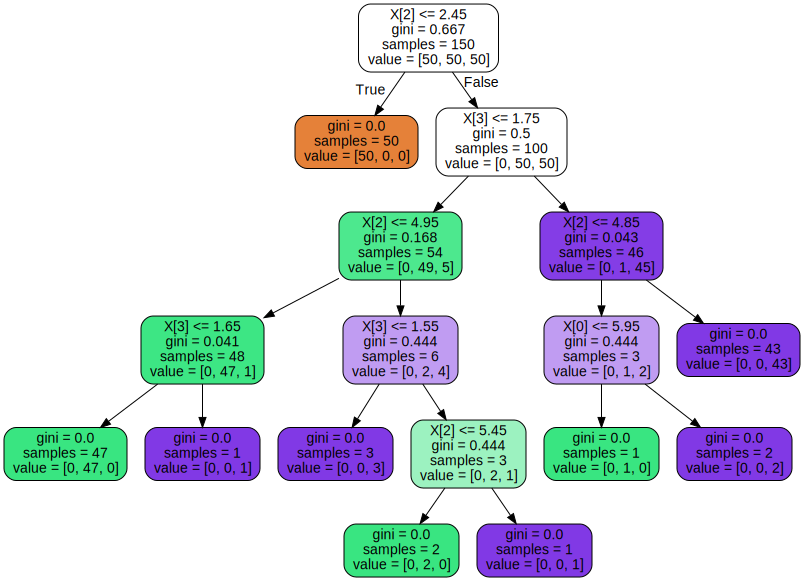

In [23]:
dot = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot)
graph

In [24]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [25]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00      1.00      1.00        10
    Iris-setosa       1.00    

In [26]:
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 1.0000


In [27]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#**THANK YOU**